# Agenda 
1. AR Models
2. MA Models
3. ARMA Models
4. ARIMA Models

# Autoregressive Models (AR)

An autoregressive (AR) model is when a value from a time series is regressed on previous values from the same time series.

In words, the mathematical idea is the following:

$$ \text{Today = constant + slope} \times \text{yesterday + noise} $$

Or, mathematically:
$$\large Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

In [47]:
# Make Some Data
import numpy as np
import pandas as pd
np.random.seed(11)
n = 12*10
constant = 8
slope = 0.7
noise_weight = 1
noise = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(constant + slope*(data[i-1]-constant) + noise[i] if i>1 else constant + slope + noise[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

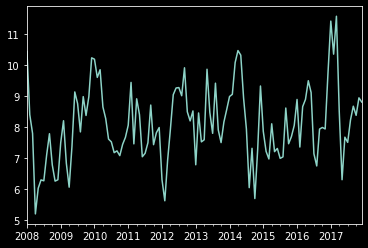

In [48]:
import matplotlib.pyplot as plt

with plt.style.context('dark_background'):
    time_series.plot()

In [49]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
ar_model = ARMA(time_series, order=(1,0)).fit()
print(ar_model.summary())
print(ar_model.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(1, 0)   Log Likelihood                -167.106
Method:                       css-mle   S.D. of innovations              0.972
Date:                Thu, 10 Sep 2020   AIC                            340.213
Time:                        16:48:22   BIC                            348.575
Sample:                    01-31-2008   HQIC                           343.609
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1494      0.222     36.755      0.000       7.715       8.584
ar.L1.y        0.6042      0.074      8.199      0.000       0.460       0.749
                                    Roots           

We see that the constant and coefficient almost match what we specified when we created the data.  Also the coefficient is statistically significant 

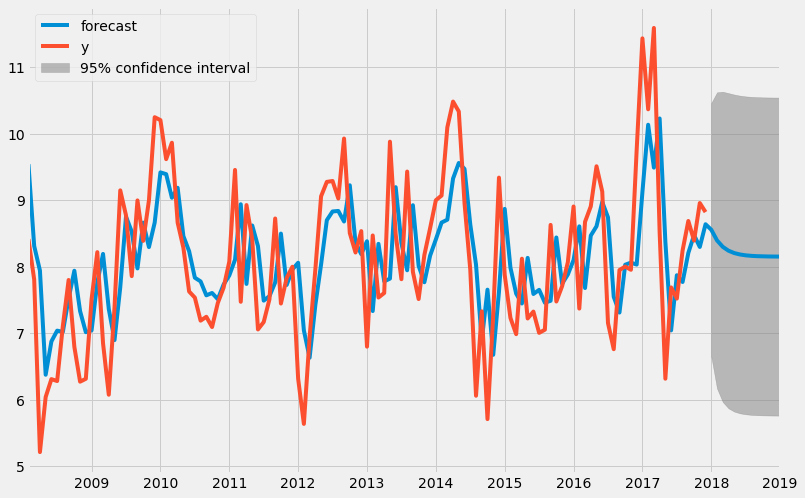

In [50]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize = (12, 8))
    ar_model.plot_predict(1,n+12, ax = ax)
    plt.show()

How does it make the prediction? Lets make a prediction for January 2018

In [51]:
ar_model.predict(1,n+12)['2017-12-31':]

2017-12-31    8.636624
2018-01-31    8.554452
2018-02-28    8.394167
2018-03-31    8.297316
2018-04-30    8.238795
2018-05-31    8.203434
2018-06-30    8.182067
2018-07-31    8.169156
2018-08-31    8.161355
2018-09-30    8.156641
2018-10-31    8.153793
2018-11-30    8.152072
2018-12-31    8.151032
2019-01-31    8.150404
Freq: M, dtype: float64

In [52]:
time_series.tail()

2017-08-31    8.242136
2017-09-30    8.686048
2017-10-31    8.390830
2017-11-30    8.955710
2017-12-31    8.819719
Freq: M, dtype: float64

In [53]:
ar_model.params

const      8.149444
ar.L1.y    0.604241
dtype: float64

Today = constant + slope×yesterday + noise

In [54]:
ar_model.params['const'] + (ar_model.params['ar.L1.y'] * (time_series['2017-12-31'] - ar_model.params['const']) )

8.554452357493465

### AR(2)

Today = constant + slope_1×yesterday + slope_2 x 2 days ago + noise

In [55]:
ar_model_2 = ARMA(time_series, order=(2,0)).fit()
print(ar_model_2.summary())
print(ar_model_2.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 0)   Log Likelihood                -166.920
Method:                       css-mle   S.D. of innovations              0.971
Date:                Thu, 10 Sep 2020   AIC                            341.841
Time:                        16:48:23   BIC                            352.991
Sample:                    01-31-2008   HQIC                           346.369
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1450      0.210     38.759      0.000       7.733       8.557
ar.L1.y        0.6385      0.093      6.899      0.000       0.457       0.820
ar.L2.y       -0.0565      0.093     -0.611      0.5

We see that the second AR component is not statistically significant - indication that it is not needed 

In [56]:
ar_model.aic, ar_model_2.aic

(340.2128061935483, 341.84054397538887)

Another way to compare is with a MSE

In [57]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(time_series, test_size = 0.3)

In [58]:
train.shape, test.shape

((84,), (36,))

In [59]:
df['original'] = time_series

In [60]:
time_series.tail()

2017-08-31    8.242136
2017-09-30    8.686048
2017-10-31    8.390830
2017-11-30    8.955710
2017-12-31    8.819719
Freq: M, dtype: float64

In [61]:
df.head()

,train,test,original
0,,,
2008-01-31,10.449455,NaN,10.449455
2008-02-29,8.413927,NaN,8.413927
2008-03-31,7.805184,NaN,7.805184
2008-04-30,5.210310,NaN,5.210310
2008-05-31,6.038932,NaN,6.038932


In [62]:
df.shape

(120, 3)

In [63]:
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
df = pd.DataFrame(date_vals)
df.set_index(0, inplace = True)
df['train'] = train
df['test'] = test

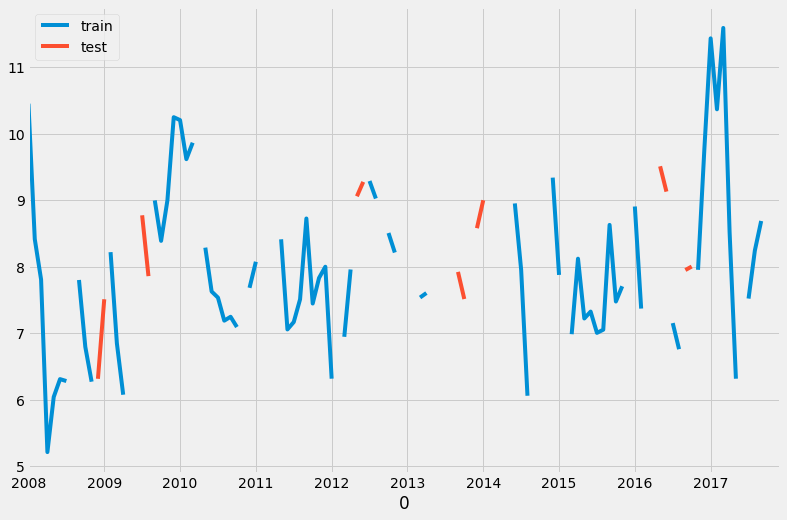

In [64]:
with plt.style.context('fivethirtyeight'):
    df.plot(figsize = (12, 8))

I can't use a random split, otherwise I'll be making predictions on data points that I have data in the future that I trained on. 

In [65]:
train_1 = time_series[:-24]
test_1 = time_series[-24:]

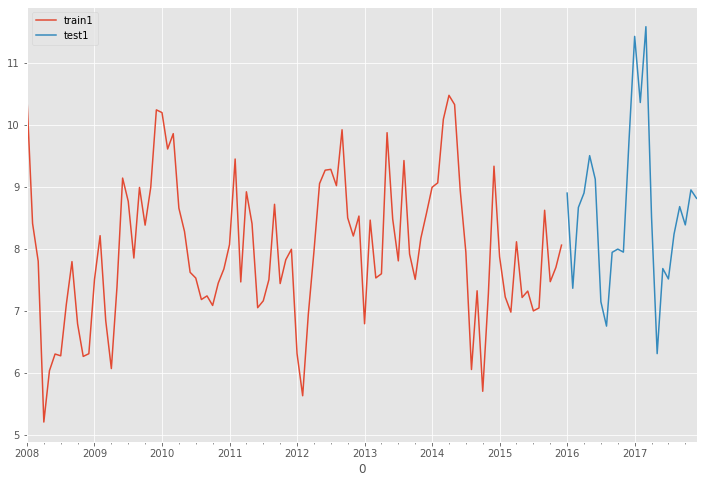

In [66]:
df['train1'] = train_1
df['test1'] = test_1

with plt.style.context('ggplot'):
    df[['train1', 'test1']].plot(figsize = (12, 8))

In [67]:
ar_model_2.forecast(steps = 12)[0]

array([8.53001962, 8.35272703, 8.25588896, 8.20407198, 8.17645661,
       8.16175101, 8.1539213 , 8.14975266, 8.14753323, 8.14635158,
       8.14572247, 8.14538752])

In [68]:
from sklearn.metrics import mean_squared_error

ar_model_2 = ARMA(train, order=(2,0)).fit()
predictions_ar_2 = ar_model_2.forecast(steps = 24)[0]

ar_model = ARMA(train, order=(1,0)).fit()
predictions_ar_1 = ar_model.forecast(steps = 24)[0]

/Users/jeffreyherman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jeffreyherman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [69]:
mse_ar_1 = mean_squared_error(test_1, predictions_ar_1)
mse_ar_2 = mean_squared_error(test_1, predictions_ar_2)

In [70]:
print(f'MSE for AR(1) {mse_ar_1}')
print(f'MSE for AR(2) {mse_ar_2}')

MSE for AR(1) 1.9505034307778988
MSE for AR(2) 1.9429614580299832


## MA Models 

The Moving Average model can be described as the weighted sum of today's and yesterday's noise.

In words, the mathematical idea is the following:

Today = Mean + Noise + Slope×yesterday's noise
 
Or, mathematically:

$$\large 𝑌𝑡=𝜇+𝜖𝑡+𝜃∗𝜖𝑡−1$$

In [54]:
# create data 
n = 12*10
mu = 8
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + theta*errors[i-1] + errors[i] if i>1 else mu + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

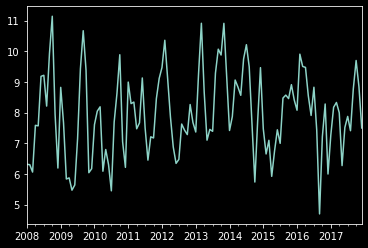

In [55]:
with plt.style.context('dark_background'):
    time_series.plot()

In [56]:
ma_model = ARMA(time_series, order=(0,1)).fit()
print(ma_model.summary())
print(ma_model.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(0, 1)   Log Likelihood                -169.383
Method:                       css-mle   S.D. of innovations              0.986
Date:                Thu, 10 Sep 2020   AIC                            344.767
Time:                        08:32:16   BIC                            353.129
Sample:                    01-31-2008   HQIC                           348.163
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9374      0.170     46.691      0.000       7.604       8.271
ma.L1.y        0.8963      0.042     21.168      0.000       0.813       0.979
                                    Roots           

Lets see how to get a prediction.  I want to predict for `2018-01-31` 

In [57]:
ma_model.predict(1,n+12)['2017-12-31':]

2017-12-31    7.785746
2018-01-31    7.679887
2018-02-28    7.937382
2018-03-31    7.937382
2018-04-30    7.937382
2018-05-31    7.937382
2018-06-30    7.937382
2018-07-31    7.937382
2018-08-31    7.937382
2018-09-30    7.937382
2018-10-31    7.937382
2018-11-30    7.937382
2018-12-31    7.937382
2019-01-31    7.937382
Freq: M, dtype: float64

In [58]:
time_series.tail()

2017-08-31    7.409072
2017-09-30    8.775402
2017-10-31    9.699222
2017-11-30    8.846099
2017-12-31    7.498448
Freq: M, dtype: float64

In [59]:
ma_model.params

const      7.937382
ma.L1.y    0.896264
dtype: float64

$$\large 𝑌𝑡=𝜇+𝜖𝑡+𝜃∗𝜖𝑡−1$$

In [60]:
error_t_minus_one = time_series.loc['2017-12-31'] - ma_model.predict(1,n+12)['2017-12-31':][0]

In [61]:
ma_model.params['const'] + error_t_minus_one * ma_model.params['ma.L1.y']

7.679887101406796

Notice that the values become a constant after January 2018, why is that?

In [62]:
ma_model.predict(1,n+12)['2017-12-31':]

2017-12-31    7.785746
2018-01-31    7.679887
2018-02-28    7.937382
2018-03-31    7.937382
2018-04-30    7.937382
2018-05-31    7.937382
2018-06-30    7.937382
2018-07-31    7.937382
2018-08-31    7.937382
2018-09-30    7.937382
2018-10-31    7.937382
2018-11-30    7.937382
2018-12-31    7.937382
2019-01-31    7.937382
Freq: M, dtype: float64

We no longer have an error, so it is looking at the constant 

In [63]:
ma_model.params

const      7.937382
ma.L1.y    0.896264
dtype: float64

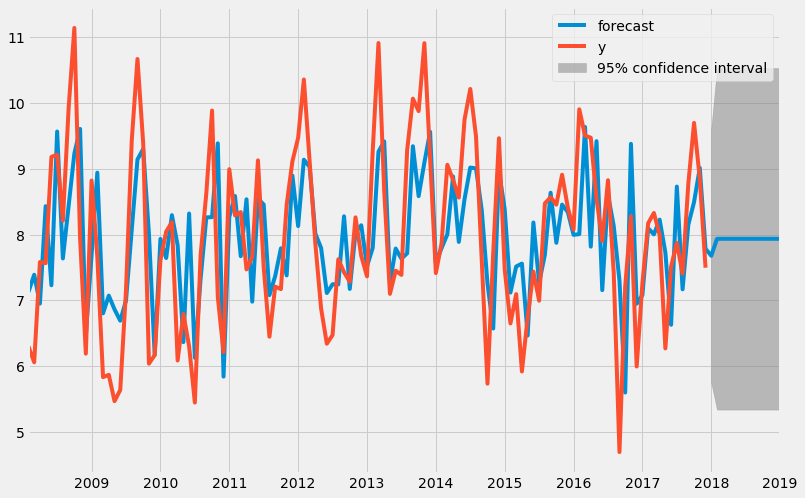

In [64]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize = (12, 8))
    ma_model.plot_predict(1,n+12, ax = ax)
    plt.show()

### MA(2)

In [65]:
ma_model_2 = ARMA(time_series, order=(0,2)).fit()
print(ma_model_2.summary())
print(ma_model_2.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(0, 2)   Log Likelihood                -169.330
Method:                       css-mle   S.D. of innovations              0.985
Date:                Thu, 10 Sep 2020   AIC                            346.659
Time:                        08:32:28   BIC                            357.809
Sample:                    01-31-2008   HQIC                           351.187
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9364      0.175     45.403      0.000       7.594       8.279
ma.L1.y        0.9220      0.089     10.305      0.000       0.747       1.097
ma.L2.y        0.0289      0.088      0.329      0.7

## ARMA

Combines both AR and MA components into one model.

$$\large𝑌𝑡 = 𝜇 + 𝜙∗𝑌𝑡−1 + 𝜃∗𝜖𝑡−1 + 𝜖𝑡$$

In [66]:
# Make data
n = 12*10
mu = 8
phi = 0.7
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + phi*(data[i-1]-mu) + errors[i] + theta*errors[i-1]  if i>1 else mu + phi + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

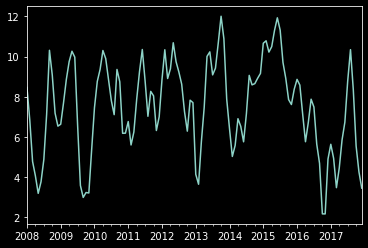

In [67]:
with plt.style.context('dark_background'):
    time_series.plot()

In [68]:
arma_model = ARMA(time_series, order=(1,1)).fit()
print(arma_model.summary())
print(arma_model.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(1, 1)   Log Likelihood                -175.791
Method:                       css-mle   S.D. of innovations              1.035
Date:                Thu, 10 Sep 2020   AIC                            359.582
Time:                        08:32:40   BIC                            370.732
Sample:                    01-31-2008   HQIC                           364.110
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4618      0.497     15.022      0.000       6.488       8.435
ar.L1.y        0.6544      0.072      9.077      0.000       0.513       0.796
ma.L1.y        0.8511      0.055     15.410      0.0

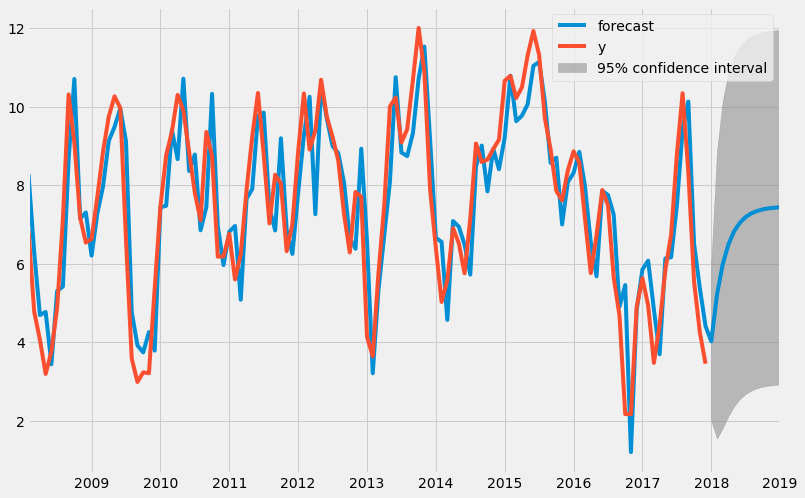

In [69]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize = (12, 8))
    arma_model.plot_predict(1,n+12, ax = ax)
    plt.show()

## ARIMA

Combines AR and MA components as well as an <b> Integrated </b> component which accounts for trends.

AR, MA, and ARMA models require stationarity. <br>
ARIMA models can handle non-stationary time series due to the <b>I</b> component.

In [70]:
# create data
n = 12*10
mu = 8
phi = 0.7
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + phi*(data[i-1]-mu) + errors[i] + theta*errors[i-1] + 0.05*i  if i>1 else mu + phi + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

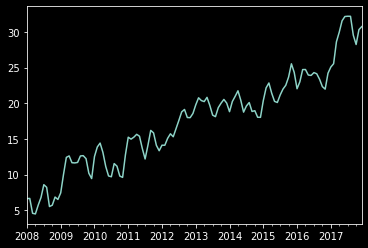

In [71]:
with plt.style.context('dark_background'):
    time_series.plot()

In [72]:
roll_mean = time_series.rolling(window=7).mean()
roll_std = time_series.rolling(window=7).std()

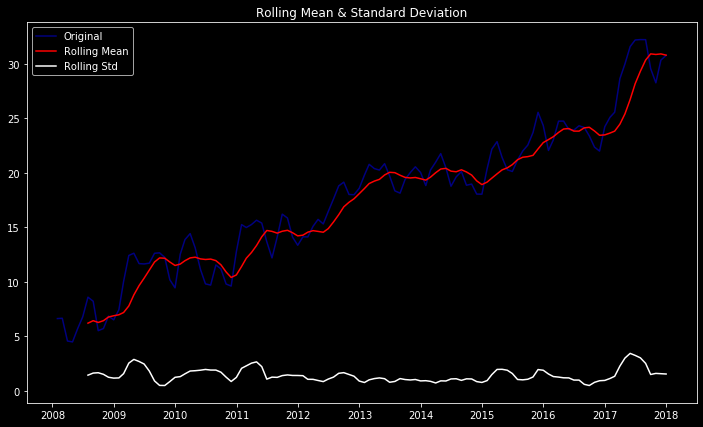

In [73]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(12,7))
    plt.plot(time_series, color='blue', label='Original', alpha = 0.5)
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='white', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

In [74]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(time_series)
dftest

(-0.5009929761904094,
 0.8918225782144366,
 8,
 111,
 {'1%': -3.490683082754047,
  '5%': -2.8879516565798817,
  '10%': -2.5808574442009578},
 311.1487504358256)

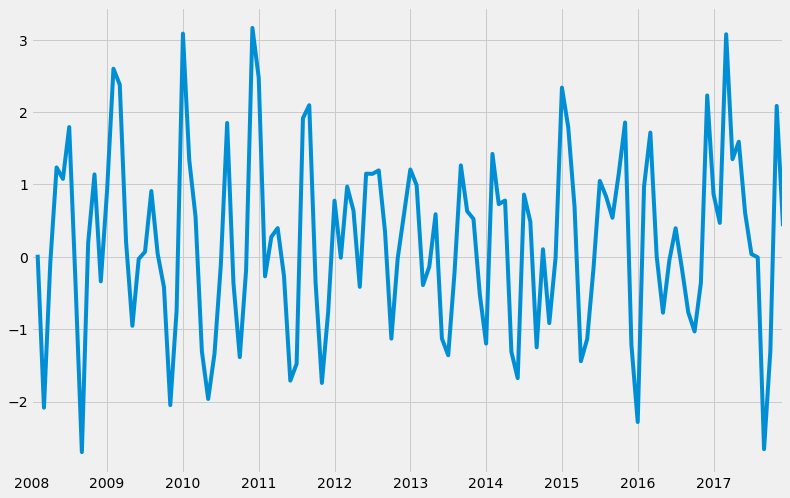

In [75]:
with plt.style.context('fivethirtyeight'):
    time_series.diff(1).plot(figsize = (12, 8))

What happens if I don't do anything about the stationarity? 

In [76]:
arma_model = ARMA(time_series, order=(1,1)).fit()
print(arma_model.summary())
print(arma_model.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(1, 1)   Log Likelihood                -180.843
Method:                       css-mle   S.D. of innovations              1.068
Date:                Thu, 10 Sep 2020   AIC                            369.685
Time:                        08:32:49   BIC                            380.835
Sample:                    01-31-2008   HQIC                           374.213
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6099      4.987      3.531      0.001       7.835      27.385
ar.L1.y        0.9713      0.023     42.565      0.000       0.927       1.016
ma.L1.y        0.8381      0.094      8.908      0.0

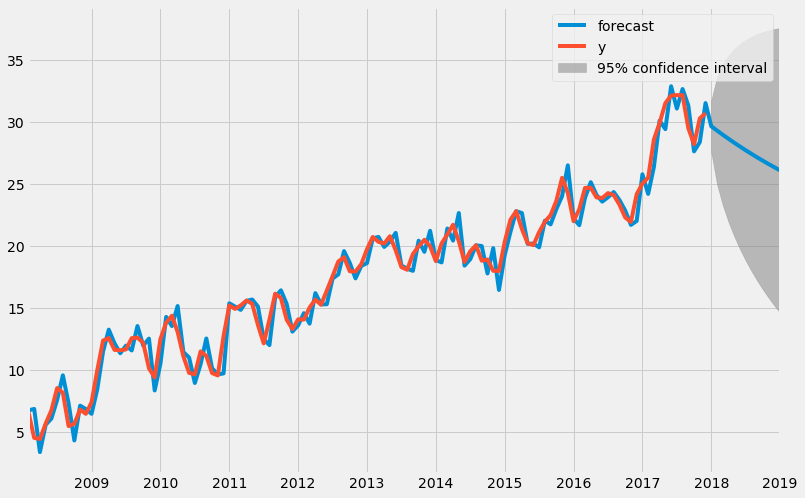

In [77]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize = (12, 8))
    arma_model.plot_predict(1,n+12, ax = ax)
    plt.show()

In [78]:
from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(time_series, order=(1,1,1)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -173.254
Method:                       css-mle   S.D. of innovations              1.020
Date:                Thu, 10 Sep 2020   AIC                            354.508
Time:                        08:32:53   BIC                            365.624
Sample:                    02-29-2008   HQIC                           359.022
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2029      0.142      1.428      0.156      -0.076       0.481
ar.L1.D.y     -0.3128      0.089     -3.498      0.001      -0.488      -0.138
ma.L1.D.y      0.9999      0.058     17.243      0.000       0.886       1.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.1969           +0.0000j            3.1969            0.5000
MA.1           -1.0001           +0.0000j            1.0001            0.5000
-----------------------------------------------------------------------------
"""

In [79]:
arima_model.aic

354.507536470093

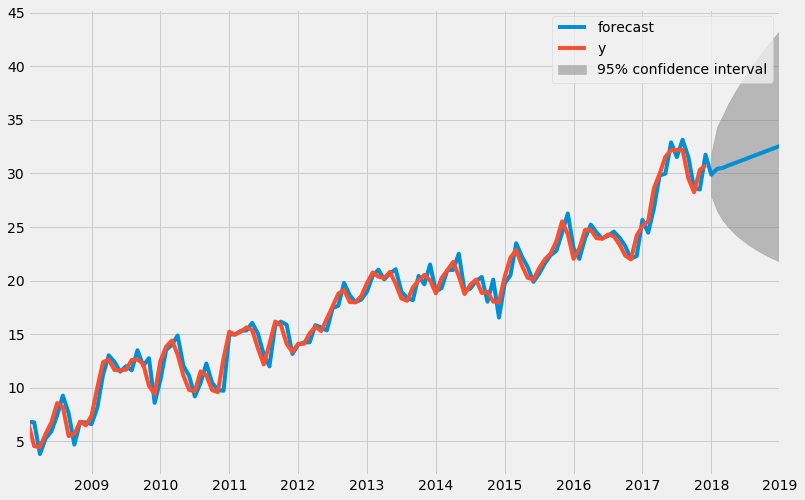

In [81]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize = (12, 8))
    arima_model.plot_predict(1,n+12, ax = ax)
    plt.show()

## Finding Correct Value for ARIMA 

In [82]:
p = [0, 1, 2]
q = [0, 1, 2]

for ar in p:
    for ma in q:
        arima_model = ARIMA(time_series, order=(ar,1,ma)).fit()
        print(f'({ar},1,{ma}) - AIC: {arima_model.aic}')

(0,1,0) - AIC: 395.5888813169554
(0,1,1) - AIC: 360.4590109621308
(0,1,2) - AIC: 350.1251917381571
(1,1,0) - AIC: 386.3419249731424
(1,1,1) - AIC: 354.507536470093
(1,1,2) - AIC: 340.4037842664642
(2,1,0) - AIC: 358.0146064909966
(2,1,1) - AIC: 355.71714145587686
(2,1,2) - AIC: 341.6231378513107


/Users/jeffreyherman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


## ACF and PACF 

Auto-correlation function (ACF)
- Measures relationship between points and various lags.

Partial auto-correlation function (PACF)
- Measures relationship between points and various lags without the influence of other lags.

| Plot | AR(p) | MA(q) | ARMA(p, q) | 
|------|-------|------|-------|
| ACF    | Tails off | Cuts off after lag q   | Tails Off  | 
| PACF    | Cuts off after lag p  | Tails off   | Tails off  | 

Look at a AR(1) time series.  The PACF should show that it tails off after lag 1 

In [83]:
# AR(1)
n = 12*10
constant = 8
slope = 0.7
noise_weight = 1
noise = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(constant + slope*(data[i-1]-constant) + noise[i] if i>1 else constant + slope + noise[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

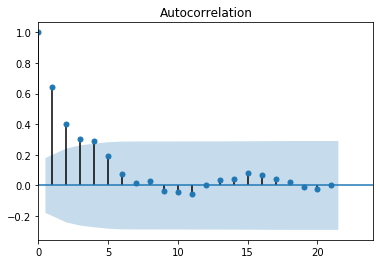

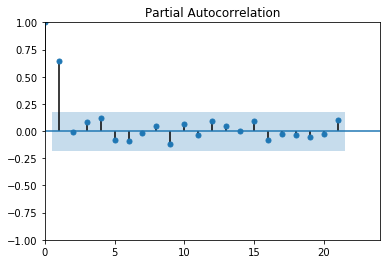

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(time_series); plt.xlim(0,24); plt.show()
plot_pacf(time_series); plt.xlim(0,24); plt.ylim(-1,1);plt.show()

Now looking at a MA(1) model.  ACF should tail off after 1 lag 

In [85]:
n = 12*10
mu = 8
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + theta*errors[i-1] + errors[i] if i>1 else mu + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

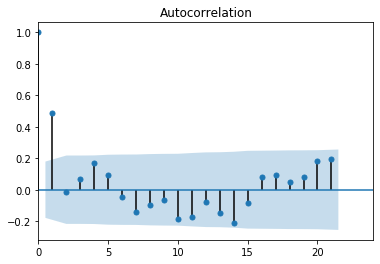

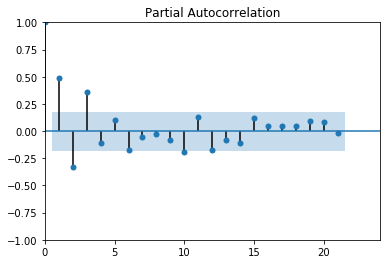

In [86]:
plot_acf(time_series); plt.xlim(0,24); plt.show()
plot_pacf(time_series); plt.xlim(0,24); plt.ylim(-1,1);plt.show()